In [42]:
import matplotlib.pyplot as plt

class Point:
    def __init__(self, x, y, a, b, p):
        self.x = x
        self.y = y
        self.a = a
        self.b = b
        self.p = p

        if self.x != None and self.y != None:
            if not ((self.y ** 2) % self.p == (self.x ** 3 + self.a * self.x + self.b) % self.p):
                raise ValueError("Точка не находится на кривой")
        

    def __add__(self, other):
        # Если мы складываем точку с самой собой, то удваиваем ее, используя метод double()
        if self.x == other.x and self.y == other.y:
            return self.double()

        # Если x-координаты двух точек равны, то результатом
        # сложения является точка (None, None)
        if self.x == other.x:
            return Point(None, None, self.a, self.b, self.p)

        # Вычисляем коэффициенты x и y
        s = (other.y - self.y) * pow(other.x - self.x, -1, self.p)
        x = (s ** 2 - self.x - other.x) % self.p
        y = (s * (self.x - x) - self.y) % self.p

        return Point(x, y, self.a, self.b, self.p)

    def double(self):
        # Вычисляем коэффициенты x и y
        s = (3 * self.x ** 2 + self.a) * pow(2 * self.y, -1, self.p)
        x = (s ** 2 - 2 * self.x) % self.p
        y = (s * (self.x - x) - self.y) % self.p

        return Point(x, y, self.a, self.b, self.p)

# Функция для нахождения точек, которые принадлежат кривой
get_points_on_curve = lambda a, b, p: [Point(x, y, a, b, p) for x in range(p) for y in range(p) if (y ** 2) % p == (x ** 3 + a * x + b) % p]


(0, 1)
(0, 4)
(1, 2)
(1, 3)
(3, 2)
(3, 3)


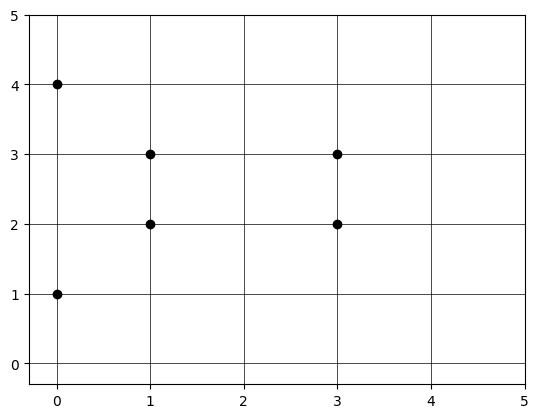

In [43]:
def display(points, fig, ax):
    # Область для отображения точек
    ax.set_xlim([-0.3, p])
    ax.set_ylim([-0.3, p])
    plt.grid(color = 'black', linewidth = 0.5)
    for point in points:
        ax.scatter(point.x, point.y, color = "k")

p = int(input("Введите p = ")) # 5
a = int(input("Введите a = ")) # 2
b = int(input("Введите b = ")) # 1

points = get_points_on_curve(a, b, p)

for point in points:
    print(f"({point.x}, {point.y})")

fig, ax = plt.subplots(1)
display(points, fig, ax)

Сложение точек
Сумма двух точек (0, 1) и (3, 3): (3, 2)


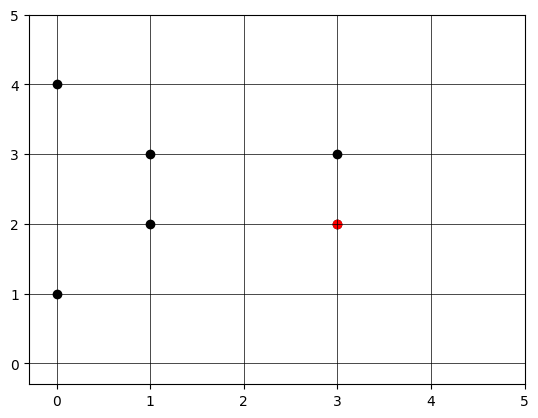

In [48]:
fig, ax = plt.subplots(1)
display(points, fig, ax)

# Точки для сложения
print("Сложение точек")
point1 = Point(int(input("Введите x1 = ")), int(input("Введите y1 = ")), a, b, p)
point2 = Point(int(input("Введите x2 = ")), int(input("Введите y2 = ")), a, b, p)

# Сумма точек
sum_point = point1 + point2
print(f"Сумма двух точек ({point1.x}, {point1.y}) и ({point2.x}, {point2.y}): ({sum_point.x}, {sum_point.y})")
ax.scatter(sum_point.x, sum_point.y, color = "r")
if sum_point.x == None:
    print("Бесконечно удаленная точка")

Удвоение точки
Удвоение точки (3, 3): (0, 4)


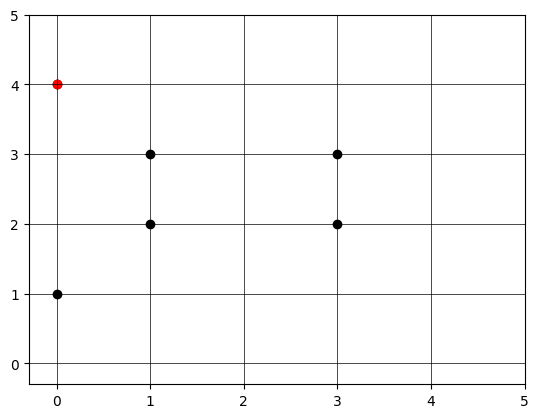

In [50]:
fig, ax = plt.subplots(1)
display(points, fig, ax)

# Точка для удвоения
print("Удвоение точки")
point3 = Point(int(input("Введите x = ")), int(input("Введите y = ")), a, b, p)

# Находим удвоение точки
double_point = point3.double()
print(f"Удвоение точки ({point3.x}, {point3.y}): ({double_point.x}, {double_point.y})")
ax.scatter(double_point.x, double_point.y, color = "r")